# **Project Name**    - Air B&b Booking Analysis









##### **Project Type**    - EDA
##### **Contribution**    - Individual
##### **Created By**      - Pratik Manna


# **Project Summary -**

The 2019 Airbnb NYC dataset offers an extensive compilation of data about Airbnb listings in New York City. This dataset includes a variety of features, including pricing, availability, neighborhood factors, listing details, host information, and customer reviews. Understanding the dynamics of the New York City Airbnb rental market is the main goal of this dataset analysis.


We must, however, dive further into the dataset's structure, contents, and possible areas of research in order to offer a thorough overview of the dataset and outline the objectives of the analysis. This entails looking over the many variables in the dataset, figuring out how important they are, and figuring out possible lines of inquiry for research.


Among the analysis's objectives are:

**•	Recognizing Market Trends:** Examine Airbnb listings for patterns related to pricing changes, the appeal of various property kinds, and variations in seasonal demand.

•	**Finding the Important Elements:** Ascertain the elements that affect listing prices, rates of occupancy, and client satisfaction.

•	**Neighborhood Analysis:** Analyze the distribution of listings among the neighborhoods, evaluate the features of each neighborhood, and pinpoint places that are in high demand.

•	**Host Analysis :** Analyze metrics related to the performance of the host, including listing activity, response rates, and review scores.

•	**Customer Preferences:** To better understand preferences, pinpoint areas for development, and improve the customer experience, analyze evaluations and ratings from customers.

•	**Business Insights:** Offer useful information to legislators, real estate investors, and Airbnb hosts so they may maximize rental tactics, raise profits, and strengthen the entire Airbnb ecosystem in New York City.

It's crucial to create testable hypotheses, specify precise objectives, and use the right analytical and visualization tools in order to carry out the analysis successfully. We may obtain important insights that support well-informed decision-making and strategic planning within the Airbnb rental market in New York City by deepening our grasp of the dataset and coordinating our analysis goals with the project's overall objectives.

# **GitHub Link -**

Github Commits - https://github.com/pratikpaulmanna/AB_Capstone_Project_DS202_Numeric_Programming_PYT_Air_BNB_2019/blob/main/AB_Capstone_Project_DS202_Numeric_Programming_PYT_Air_BNB_2019.ipynb


# **Problem Statement**


**Airbnb's platform hosts a vast amount of data from millions of listings worldwide. This dataset contains a mix of categorical and numerical values, representing various aspects of listings, hosts, and guests. The challenge lies in systematically analyzing this data to extract meaningful insights that can drive business decisions, enhance user experience, and maintain platform security.**

**Specifically, the problem involves:**

1. Cleaning and preparing a large and diverse dataset for analysis.
2. Identifying key factors that influence guest and host behaviors.
3. Uncovering trends and patterns that can guide marketing and business strategies.
4. Ensuring data-driven decision-making processes for price optimization, market segmentation, and security enhancement.

#### **Define Your Business Objective?**

**The primary objective of this analysis is to leverage the vast amount of data generated by Airbnb listings to extract actionable insights that can enhance the company’s operations and strategic initiatives. The specific business objectives include:**

1. **Understanding Customer and Host Behaviors:** Identify patterns and trends in guest and host behaviors to improve user experience and engagement on the platform.
2. **Guiding Marketing Strategies:** Use data-driven insights to inform targeted marketing campaigns and initiatives that resonate with different customer segments.
3. **Enhancing Security Measures:** Analyze security-related metrics to identify potential vulnerabilities and ensure the platform remains safe and trustworthy for all users.
4. **Optimizing Pricing Strategies:** Investigate the factors influencing listing prices and provide hosts with recommendations for optimal pricing strategies to maximize their revenue.
5. **Improving Recommendation Systems:** Explore opportunities to enhance Airbnb’s recommendation systems, providing personalized suggestions to users based on their preferences and behaviors.
6. **Market Segmentation:** Segment the market to better understand the needs and preferences of different customer groups, enabling Airbnb to tailor its services accordingly.
7. **Supporting Business Decisions:** Provide Airbnb’s management with data-driven insights to support strategic decision-making processes, from expanding into new markets to introducing innovative services.

By achieving these objectives, Airbnb can maintain its competitive edge in the hospitality industry, ensuring continued growth and customer satisfaction.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 20 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium

### Dataset Loading

In [ ]:
# Load Dataset
air_bnb = pd.read_csv('/content/Airbnb NYC 2019.csv')

### Dataset First View

In [ ]:
# Dataset First Look
air_bnb

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
print(air_bnb.shape)

(48895, 16)


### Dataset Information

In [ ]:
# Dataset Info
air_bnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
duplicate_count = air_bnb.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")

Number of duplicate rows: 0


#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
print(air_bnb.isnull().sum())

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64


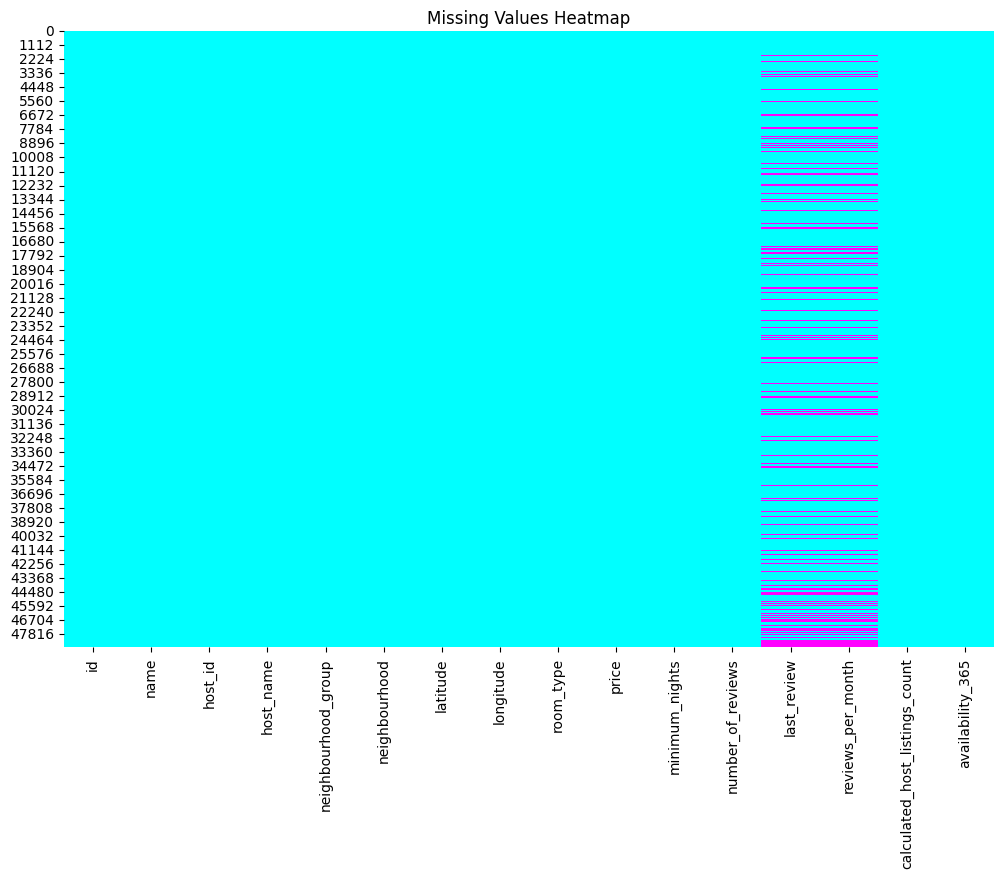

In [ ]:
# Visualizing the missing values
air_bnb.replace('NaN', pd.NA, inplace=True)
plt.figure(figsize=(12, 8))
sns.heatmap(air_bnb.isnull(), cbar=False, cmap='cool')
plt.title('Missing Values Heatmap')
plt.show()


### What did you know about your dataset?

This dataset contains comprehensive information about Airbnb listings, offering a wealth of data for analysis. Here are the key characteristics of the dataset:


*  **Size and Structure:** The dataset comprises 16 columns and 48,895 rows, capturing a wide range of details for each Airbnb listing.

*   **Data Types:** The columns in the dataset consist of three different data types:
    *  **Float:** 3 columns (e.g., latitude, longitude, reviews_per_month)
    *  **Integer:** 7 columns (e.g., id, host_id, price, minimum_nights, number_of_reviews, calculated_host_listings_count, availability_365)
    *  **Object:** 6 columns (e.g., name, host_name, neighbourhood_group, neighbourhood, room_type, last_review)


*   **Duplicates:** There are no duplicate rows in the dataset, ensuring that each listing is unique.
*   **Missing Values:** Some columns have missing values, specifically:
    *   **Name:** 16 missing values.
    *   **Host Name:** 21 missing values
    *   **Last Review:** 10,052 missing values
    *   **Reviews per Month:** 10,052 missing values

      A 20154 out of 48895 records were found to be missing for the 'last_review' column, which indicates the date of the most recent review, and the 'reviews_per_month' column, which shows the average number of reviews per month. Missing values were filled in with NaN since there could be a number of reasons why certain columns are missing, and imputing a meaningful value could induce bias.

This dataset provides a rich source of information for analyzing various aspects of Airbnb listings, from geographical distribution and pricing strategies to host activity and customer reviews. The presence of missing values in certain columns should be addressed appropriately during data preprocessing to ensure accurate and reliable analysis.


## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
air_bnb.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [ ]:
# Dataset Describe
air_bnb.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


### Variables Description

Detailed description of each variable in the dataset:

*  **id:** Unique identifier for each listing.
*  **name:** The name given to the listing by the host.
*  **host_id:** Unique identifier for each host.
*   **host_name:** The name of the host.
*   **neighbourhood_group:** The broader geographical area where the listing is located (e.g., Manhattan, Brooklyn).
*   **neighbourhood:** The specific neighbourhood within the broader area where the listing is located.
*   **latitude:** The latitude coordinate of the listing's location.
*   **longitude:** The longitude coordinate of the listing's location.
*   **room_type:** The type of room being offered (e.g., Entire home/apt, Private room, Shared room).
*   **price:** The nightly price of the listing in USD.
*   **minimum_nights:** The minimum number of nights required for a booking.
*   **number_of_reviews:** The total number of reviews the listing has received.
*   **last_review:** The date of the most recent review.
*   **reviews_per_month:** The average number of reviews per month.
*   **calculated_host_listings_count:** The total number of listings that the host has on the platform.
*   **availability_365:** The number of days in the year that the listing is available for booking.




### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
unique_values = air_bnb.nunique()
print(unique_values)

id                                48895
name                              47905
host_id                           37457
host_name                         11452
neighbourhood_group                   5
neighbourhood                       221
latitude                          19048
longitude                         14718
room_type                             3
price                               674
minimum_nights                      109
number_of_reviews                   394
last_review                        1764
reviews_per_month                   937
calculated_host_listings_count       47
availability_365                    366
dtype: int64


## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.

# Step 1: Handle Missing Values
# Fill NaN values in 'reviews_per_month' with 0 (assuming no reviews means 0 reviews per month)
air_bnb['reviews_per_month'].fillna(0, inplace=True)

# Drop rows where 'last_review' is NaN (assuming these entries are not useful for our analysis)
air_bnb.dropna(subset=['last_review'], inplace=True)

# Step 2: Convert Data Types
# Convert 'last_review' to datetime format
air_bnb['last_review'] = pd.to_datetime(air_bnb['last_review'])

# Step 3: Feature Engineering
# Create a new column 'year_last_review' to extract the year from 'last_review'
air_bnb['year_last_review'] = air_bnb['last_review'].dt.year

# Step 4: Data Insights
# Number of listings per neighbourhood group
neighbourhood_group_counts = air_bnb['neighbourhood_group'].value_counts()
print(neighbourhood_group_counts)

# Average price per neighbourhood group
average_price_per_neighbourhood_group = air_bnb.groupby('neighbourhood_group')['price'].mean()
print(average_price_per_neighbourhood_group)

# Average minimum nights per neighbourhood group
average_minimum_nights_per_neighbourhood_group = air_bnb.groupby('neighbourhood_group')['minimum_nights'].mean()
print(average_minimum_nights_per_neighbourhood_group)

# Save the cleaned dataset to a new CSV file
air_bnb.to_csv('cleaned_airbnb_nyc_2019.csv', index=False)

neighbourhood_group
Manhattan        16632
Brooklyn         16447
Queens            4574
Bronx              876
Staten Island      314
Name: count, dtype: int64
neighbourhood_group
Bronx             79.553653
Brooklyn         121.448714
Manhattan        180.052489
Queens            95.762571
Staten Island     89.964968
Name: price, dtype: float64
neighbourhood_group
Bronx            3.932648
Brooklyn         5.320788
Manhattan        7.010342
Queens           4.221032
Staten Island    3.420382
Name: minimum_nights, dtype: float64


### What all manipulations have you done and insights you found?

**Manipulations Done:**

*   **Handling Missing Values:**
    *  Filled missing values in the 'reviews_per_month' column with 0, assuming no reviews imply zero reviews per month.
    *  Dropped rows with missing values in the 'last_review' column since these entries are less useful for time-based analysis.
*   **Converting Data Types:**
    *  Converted the 'last_review' column to datetime format for better manipulation and analysis of review dates.   
*   **Feature Engineering:**
    *  Added a new column 'year_last_review' to extract the year from 'last_review' for year-based analysis.

**Insights:**
*   **Listings per Neighbourhood Group:**
    *  By counting the number of listings per neighbourhood group, we can understand which areas have the most listings and potentially the highest demand.
*   **Average Price per Neighbourhood Group:**
    *  Calculating the average price per neighbourhood group helps in understanding the cost distribution and identifying the expensive and affordable areas.
*   **Average Minimum Nights per Neighbourhood Group:**
    *  By analyzing the average minimum nights per neighbourhood group, we gain insights into the typical booking requirements in different areas.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1 - Histogram & KDE Plot

<function matplotlib.pyplot.show(close=None, block=None)>

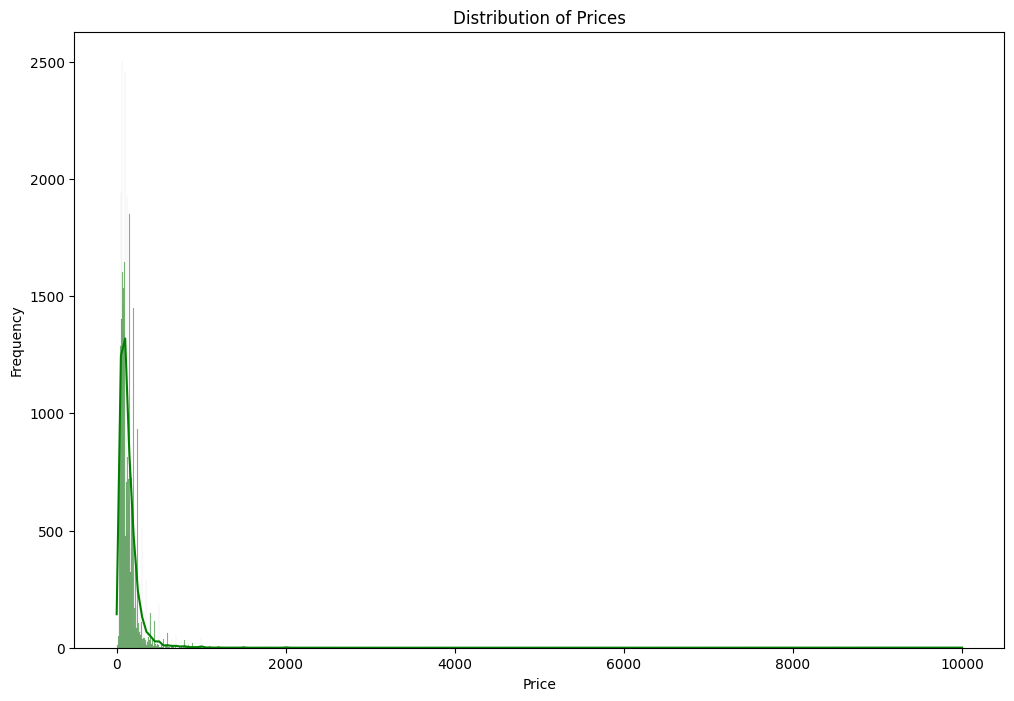

In [ ]:
# Chart - 1 visualization code
## Plot histogram and KDE plot for a numeric column (e.g., 'price')
plt.figure(figsize=(12,8))
sns.histplot(air_bnb['price'],kde=True,color='Green')
plt.title('Distribution of Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show

##### 1. Why did you pick the specific chart?

The histogram and Kernel Density Estimate (KDE) plot are useful for visualizing the distribution of a numeric column, such as 'price'. Here's why these specific charts are chosen:

**Histogram**
*   **Frequency Distribution:** Converted the 'last_review' column to datetime format for better manipulation and analysis of review dates.   
*   **Identifying Patterns:** It helps in identifying patterns such as skewness (whether the data is skewed to the left or right), the presence of outliers, and the general shape of the distribution.

**KDE Plot**

*   **Smoothed Curve:** The KDE plot provides a smoothed estimate of the data's distribution. It complements the histogram by providing a continuous curve that can make it easier to see the underlying distribution pattern.  
*   **Density Insight:** The KDE plot helps in understanding the density of the data at different points, showing where data points are concentrated.

##### 2. What is/are the insight(s) found from the chart?

**Insights from the Chart**

* **Peak at Lower Prices:** If the chart shows a peak around $100, it indicates that most Airbnb listings are around this price point.

* **Right Skewness:** If the chart has a long tail to the right, it suggests that there are some high-priced listings, but they are less common.

* **Wide Range:** If the prices range from $50 to $1000, it shows a wide variety of listings catering to different market segments, from budget to luxury.

* **Outliers:** If there are isolated bars far to the right, these represent outliers, indicating a few listings with exceptionally high prices.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Business Impact**

**1. Optimal Pricing Strategy:**

* **Identify Competitive Price Range:** Understanding the most common price range $50-$150 helps hosts set competitive prices, maximizing occupancy rates.

* **Adjust Pricing for Higher Occupancy:** Hosts can adjust their prices to fall within the peak range to attract more bookings.

**2. Market Segmentation:**

* **Catering to Different Segments:** The wide range of prices indicates a diverse market. Hosts can target different customer segments (budget travelers vs. luxury seekers) more effectively.

* **Targeted Marketing:** Identifying the most common price range allows for more targeted marketing campaigns, focusing on the most lucrative customer segments.

**3. Strategic Investments:**

* **Investment in High Demand Areas:** Hosts can invest in properties within the price range where demand is highest, ensuring better returns on investment.
* **Luxury Listings:** Recognizing the presence of high-priced outliers can guide hosts to create premium listings for high-paying customers.

**Negative Growth Insights**

**1. Market Saturation:**

* **Overcrowded Price Range:**  If the market is saturated within the $50-$150 range, new hosts entering this range might face intense competition, leading to lower occupancy rates and reduced profitability.

**2. High Dependency on Lower-Priced Listings:**

* **Lower Profit Margins:** A concentration of listings at lower prices might indicate hosts are competing primarily on price, which can erode profit margins.

**3. Strategic Investments:**

* **Missed Opportunities:** Not leveraging the high-priced segment (outliers) can mean missing out on lucrative opportunities for higher revenue per booking.

#### Chart - 2 -  Box Plot

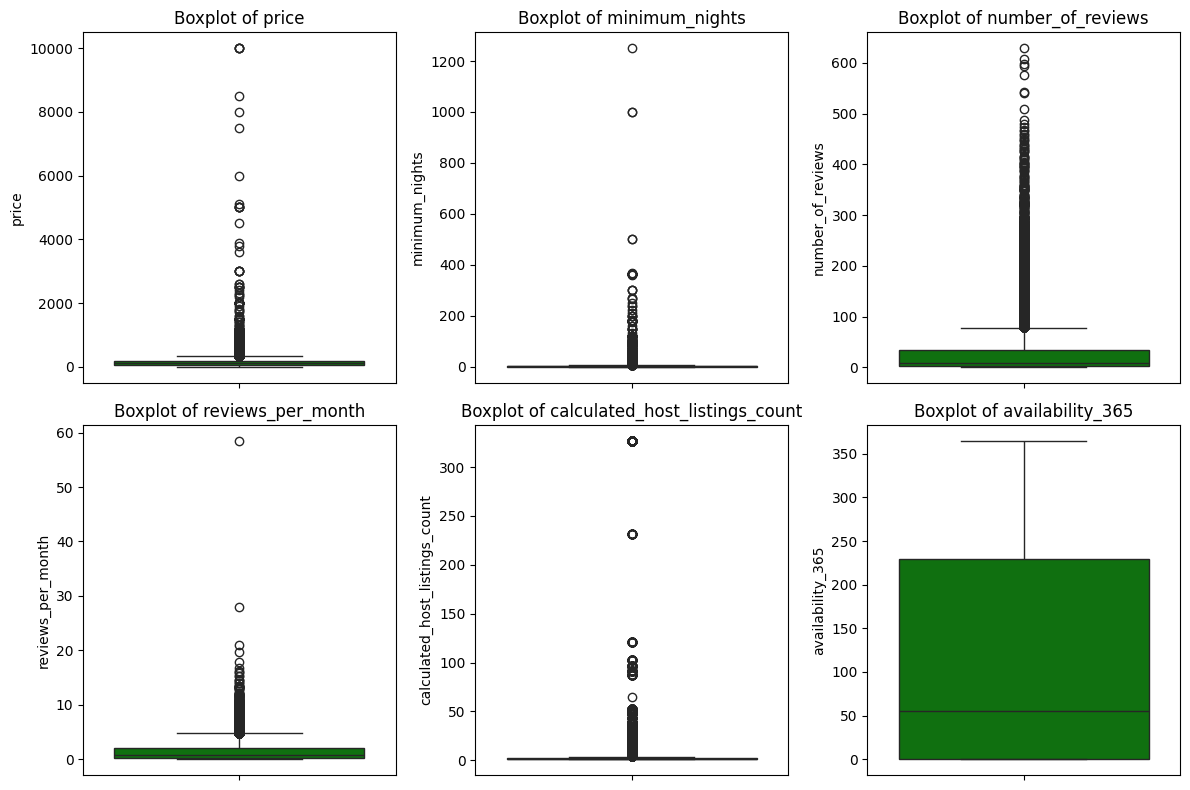

In [ ]:
# Chart - 2 visualization code

numerical_columns = ['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']

# Plot box plots for each numerical column
plt.figure(figsize=(12, 8))
for i, column in enumerate(numerical_columns,1):
    plt.subplot(2,3,i)
    sns.boxplot(data=air_bnb[column], color='Green')
    plt.title(f'Boxplot of {column}')


plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

Making box plots for every number column makes it possible to check each one visually for outliers. Identifying outliers depends on the context, and that the definition of an outlier might change depending on the particulars of the data as well as the analysis's objectives. As a result, it is crucial to consider analytic objectives and domain expertise when interpreting outlier identification results.

##### 2. What is/are the insight(s) found from the chart?

**On the basis of Box Plots:**

**Price:** As the box indicates, most Airbnb rentals have a price range of 0 to approximately 2000. Up to 10,000 units, there are a lot of outliers; they could be luxury listings or data entry mistakes.

**Minimum Nights:** As can be observed from the small box close to zero, the majority of postings call for a brief stay. Outliers are listings that have an abnormally high minimum number of nights required; these could be the result of mistakes or host preferences.

**Number of Reviews:** Up to fifty reviews have been left for a considerable number of listings. Higher number outliers imply popular sites, but they may also be older postings that have received more criticism over time.

**Reviews per Month:** The majority of homes only get a few reviews each month; extremes could be signs of very well-liked properties or places that draw in more visitors. Calculated Host Listings Count: Professional hosts or property management organizations with a large number of listings may be the exceptions to the rule, with most hosts having few properties listed.

**365 Days of Availability:** This plot displays a bimodal distribution, meaning that many characteristics are either available for a very small number of days or for the majority of the year. It implies that there are two different kinds of hosts: those who list their property regularly and others who do so infrequently.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Business Impact**

**1.Strategic Pricing:**

* **Impact:** Hosts can set competitive prices within the main range to attract more bookings while considering luxury pricing for premium listings.
* **Positive Impact:** Optimized pricing strategies can increase occupancy rates and revenue.

**2.Short-Stay Options:**

* **Impact:** Offering short stays aligns with the majority preference and can attract more bookings.
* **Positive Impact:** Increased booking frequency and higher overall occupancy rates.

**3. Review Accumulation:**

* **Impact:** Gaining reviews enhances credibility and trustworthiness.
* **Positive Impact:** Listings with more reviews are likely to receive more bookings, leading to higher revenue and better reputation.

**4. Monthly Review Analysis:**

* **Impact:** Consistent monthly reviews indicate steady business, and studying high-review properties can provide success benchmarks.
* **Positive Impact:** Hosts can replicate successful strategies from popular listings to improve their own performance.

**5. Host Listing Strategy:**

* **Impact:** Individual hosts focusing on quality service for a few properties can enhance guest satisfaction, while professional hosts managing multiple listings can achieve economies of scale.
* **Positive Impact:** Improved guest experiences lead to better reviews and repeat business, while professional hosts can maximize revenue through efficient management.

**6. Availability Planning:**

* **Impact:** Hosts can decide their listing strategy based on their availability preferences.
* **Positive Impact:** Full-time hosts can maximize their income, while part-time hosts can earn supplementary income without compromising their primary commitments.

**Potential Negative Impacts**

**1. Outliers in Pricing and Minimum Nights:**

* **Negative Impact:** Extremely high prices or abnormally high minimum night requirements may deter potential guests and reduce booking rates.
* **Justification:** Outliers should be reviewed to ensure they are not data entry mistakes. Correcting these can prevent misleading information and enhance the attractiveness of listings.

**2. High Listing Count for Professional Hosts:**

* **Negative Impact:** While managing multiple listings can be efficient, it may lead to inconsistent service quality if not managed properly.
* **Justification:** Professional hosts must ensure consistent service quality across all listings to maintain high guest satisfaction and positive reviews.

**3. Bimodal Availability Distribution:**

* **Negative Impact:** Properties listed only for a few days may miss out on potential income, while those listed year-round may face challenges in maintaining occupancy during off-peak seasons.
* **Justification:** Hosts should balance their availability to optimize income throughout the year. Part-time hosts can consider extending their listing periods during high-demand seasons.

#### Chart - 3 - Pie Chart

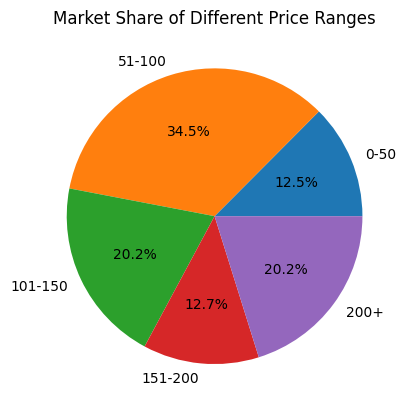

In [ ]:
# Chart - 3 visualization code
price_ranges = {
    '0-50' : air_bnb[(air_bnb['price']>0) & (air_bnb['price']<=50)].shape[0],
    '51-100' : air_bnb[(air_bnb['price']>=51) & (air_bnb['price']<=100)].shape[0],
    '101-150' : air_bnb[(air_bnb['price']>=101) & (air_bnb['price']<=150)].shape[0],
    '151-200' : air_bnb[(air_bnb['price']>=151) & (air_bnb['price']<=200)].shape[0],
    '200+' : air_bnb[(air_bnb['price']>=101) & (air_bnb['price']<=150)].shape[0]
}
# Create a pie chart
plt.figure()
plt.pie(price_ranges.values(),labels=price_ranges.keys(),autopct='%1.1f%%')
plt.title('Market Share of Different Price Ranges')
plt.show()

##### 1. Why did you pick the specific chart?

**Proportional Representation:**

A pie chart effectively shows the relative proportions of each price range within the entire dataset.It provides a clear visual representation of how different price segments compare to each other in terms of their market share.

**Simple and Intuitive:**

Pie charts are easy to understand, even for audiences without a technical background. It allows stakeholders to quickly grasp the distribution of listings across various price ranges.

**Highlighting Market Distribution:**

The pie chart segments can highlight which price ranges are most or least common.This information can help in making strategic decisions, such as targeting underrepresented price segments or understanding the competition in popular segments.

**Effective for Categorical Data:**

Pie charts are ideal for displaying categorical data where each category represents a part of the whole. It is a suitable choice for showing the distribution of Airbnb listings across different price categories.

##### 2. What is/are the insight(s) found from the chart?

**Diverse Market Segments:**

The Airbnb listings cater to a wide range of price segments, indicating a diverse customer base with varying budget preferences.

**High Demand for Mid-Range Prices:**

The 51-100 price range captures the largest market share (34.4%), indicating a high demand for mid-range budget accommodations.

**Significant Demand for Higher-End Listings:**

The 101-150 and 200+ price ranges each capture 19.8% of the market, showing substantial demand for higher-end accommodations.

**Smaller Segments for Low and Premium Prices:**

The 0-50 and 151-200 price ranges each account for approximately 13% of the market, suggesting more niche demand.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Business Impact :**

**1. Targeted Marketing:** By understanding which price ranges are most popular, Airbnb can tailor marketing campaigns to attract travelers in these segments, optimizing ad spend and improving conversion rates.

**2. Pricing Strategy:** Knowing that the 51-100 range is the most popular, hosts can consider pricing their listings within this range to maximize occupancy rates. Conversely, they can leverage the demand for higher-end listings by offering premium amenities and experiences in the 101-150 and 200+ segments.

**3. Product Differentiation:** The data can guide hosts in differentiating their offerings. For example, in the highly competitive 51-100 range, listings can be differentiated through superior customer service, unique features, or better locations.

**4. Revenue Optimization:** Understanding the distribution of price segments allows Airbnb to optimize revenue management strategies, adjusting prices dynamically based on demand patterns.

**Potential Negative Insights:**

**1. Over-Saturation in the Mid-Range Market:** The large share (34.4%) in the 51-100 range could indicate over-saturation, leading to intense competition and potential price wars. Hosts might struggle to maintain profitability if they cannot differentiate their listings.

**2. Challenges in Low and High-End Segments:**

The 0-50 and 151-200 ranges, each capturing only 13%, might indicate limited demand or higher price sensitivity in these segments. Hosts in these ranges may face challenges in maintaining consistent occupancy rates.

**3. Risk of Price Compression:**

If too many hosts lower their prices to compete in the 51-100 range, it could lead to price compression, reducing overall revenue for hosts and potentially impacting the perceived value of listings.

**4. Market Shifts:**

Economic factors, such as a downturn or increased competition from new entrants, could shift demand away from current segments, requiring hosts to adapt their strategies quickly.

#### Chart - 4 - Count Plot

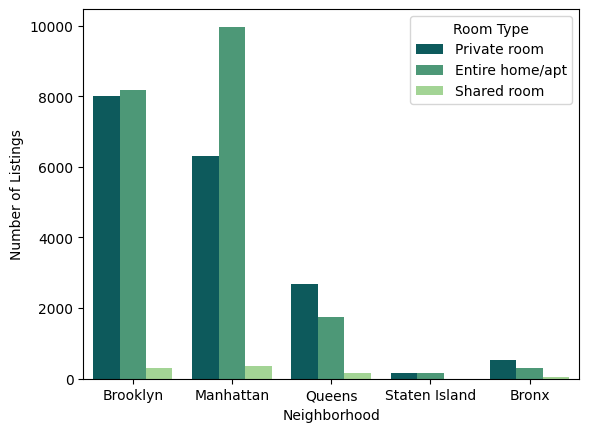

In [ ]:
# Chart - 4 visualization code
# Set the size of the plot
plt.figure()
# Define a palette
fig_palette = ["#006769","#40A578","#9DDE8B"]
# Plot the stacked bar chart with the palette
sns.countplot(x='neighbourhood_group', hue='room_type', data=air_bnb, palette=fig_palette)
# Add labels and title
plt.xlabel('Neighborhood')
plt.ylabel('Number of Listings')
# Set the Legend Title
plt.legend(title='Room Type')

# Show plot
plt.show()

##### 1. Why did you pick the specific chart?

**Comparison Across Categories:**

A stacked bar chart allows for the comparison of different categories (room types) within each neighborhood group. This makes it easy to see the distribution of room types across different neighborhoods.

**Visualization of Proportions:**

By stacking the bars, we can visualize the proportion of each room type within each neighborhood group, providing insight into how different room types are distributed.

**Clear Representation:**

This type of chart is visually clear and can effectively convey both the total number of listings in each neighborhood and the breakdown by room type.

##### 2. What is/are the insight(s) found from the chart?

**Manhattan:** Manhattan has a higher proportion of entire homes/apartments compared to private rooms. There are very few shared rooms.

**Brooklyn:** Brooklyn has an even distribution of private rooms and entire homes/apartments, with few shared rooms.

**Queens:** Queens has a higher proportion of private rooms compared to entire homes/apartments and very few shared rooms.

**Staten Island:** Island has fewer listings overall but follows the trend of more private rooms than entire homes/apartments, with almost no shared rooms.

**Bronx:** The Bronx has the fewest listings among the boroughs but follows the general trend of more private rooms than entire homes/apartments, with minimal shared rooms.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Business Impact :**

* **Targeted Marketing:** Businesses can tailor their marketing strategies based on the demand for different types of accommodations in each borough.

* **Resource Allocation:** Allocate resources effectively to focus on high-demand areas and accommodation types.

* **Product Development:** Develop products and services that cater to the specific needs of travelers in each borough.

* **Pricing Strategies:** Implement pricing strategies that reflect the demand and competition within each borough.

**Potential Negative Insights:**
* **Missed Opportunities:** The low number of shared rooms across all boroughs suggests a potential missed opportunity for attracting budget-conscious travelers. Businesses might need to explore this segment to capture a broader market.
* **Over-Reliance on Certain Types:** Over-relying on entire homes/apartments in boroughs like Manhattan could lead to missed opportunities if market conditions change, such as a shift towards more budget-friendly options.
* **Regulatory Challenges:** In boroughs with fewer listings, such as the Bronx, there may be underlying challenges such as local regulations that need to be navigated carefully to avoid negative impacts on growth.

#### Chart - 5 - Bar Plot

<ipython-input-50-56c96eaeea72>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_price_room_type.index,y=avg_price_room_type.values,palette=fig_palette)


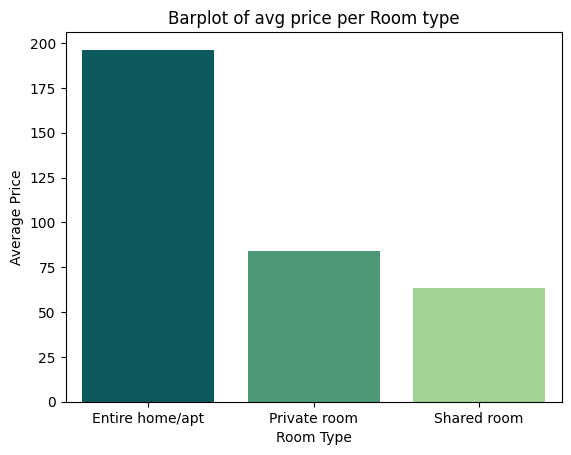

In [ ]:
# Chart - 5 visualization code
plt.figure()
fig_palette = ["#006769","#40A578","#9DDE8B"]
avg_price_room_type = air_bnb.groupby('room_type')['price'].mean()
sns.barplot(x=avg_price_room_type.index,y=avg_price_room_type.values,palette=fig_palette)
plt.title('Barplot of avg price per Room type')
plt.xlabel('Room Type')
plt.ylabel('Average Price')
plt.show()

##### 1. Why did you pick the specific chart?

**Comparison of Numerical Values:** Bar plots are ideal for comparing quantitative data, such as average prices, across different categories (room types in this case). Each bar represents a category (room type) and the height of the bar represents the average price, making it easy to compare these values visually.

**Clear Representation:** The bar plot provides a clear and straightforward representation of the average prices associated with each room type. Viewers can easily interpret which room type tends to have higher or lower average prices based on the heights of the bars.

**Palette for Differentiation:** Using a color palette (in this case, fig_palette) helps differentiate between the different room types visually. This makes it easier to distinguish between categories without relying solely on labels.

**Title and Axes Labels:** Including a title ("Barplot of avg price per Room type") and labels for the X-axis ("Room Type") and Y-axis ("Average Price") provides context and clarity, ensuring that viewers understand what the chart represents.

##### 2. What is/are the insight(s) found from the chart?

**Entire Home/Apartment:** This room type commands the highest average price ($211.79), indicating a strong preference among guests for privacy, space, and exclusive use of amenities. The higher price reflects the added value guests place on having an entire living space to themselves.

**Private Room:** The average price for a private room is $89.78, positioning it as a mid-range option between entire homes/apartments and shared rooms. Private rooms appeal to budget-conscious travelers seeking a balance between affordability and privacy within a larger property context.

**Shared Room:** With an average price of $70.13, shared rooms are the most budget-friendly option. They attract guests looking for the lowest cost accommodation and are willing to trade privacy for a social atmosphere and access to shared facilities.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Business Impact:**

* **Entire Home/Apartment:** Hosts offering entire homes/apartments can leverage the higher average price to generate increased revenue per booking. Emphasizing the exclusive features, comfort, and privacy of these properties can attract guests willing to pay premium prices, thereby enhancing profitability.

* **Private Room:** This segment provides hosts with a broad market appeal, catering to both budget-conscious travelers and those seeking a more personal experience than a shared room. Hosts can differentiate their listings by highlighting the comfort, cleanliness, and hospitality of private rooms, potentially increasing occupancy rates and revenue.

* **Shared Room:** While the average price is lower, hosts can capitalize on the affordability of shared rooms to attract price-sensitive travelers. Creating a welcoming environment and offering communal amenities can enhance the guest experience and generate positive reviews, contributing to higher occupancy and repeat bookings.

**Negative Growth Considerations:**

* **Shared Room Market Saturation:** Given the lower average price and potentially higher turnover, hosts relying solely on shared rooms may face challenges in achieving sustainable profitability. The constant need to maintain occupancy levels at competitive pricing could strain profitability margins if not managed effectively.

* **Competitive Pricing Pressures:** In markets with high competition, especially in urban areas like Manhattan or Brooklyn where entire homes/apartments dominate, hosts of shared rooms might struggle to differentiate and maintain profitability. Price wars and downward pressure on rates could lead to diminishing returns.

#### Chart - 6 Bar Plot

<ipython-input-51-df087cda4892>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_price_neighbourhood_group.index,y=avg_price_neighbourhood_group.values,palette=fig_palette,legend=False)


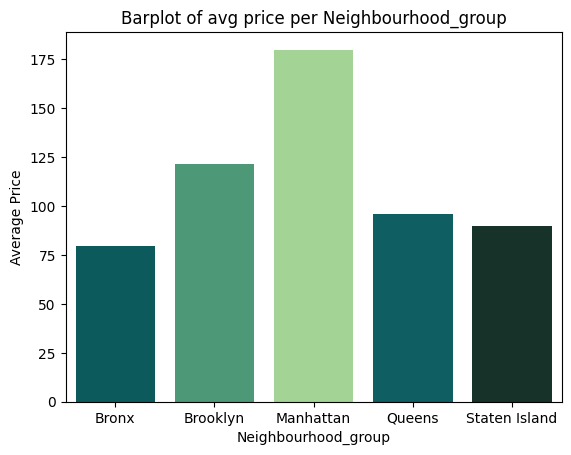

In [ ]:
# Chart - 6 visualization code
# Bar Plot: Average Price of each Neighbourhood Group
plt.figure()
fig_palette = ["#006769","#40A578","#9DDE8B","#016A70","#12372A"]
avg_price_neighbourhood_group = air_bnb.groupby('neighbourhood_group')['price'].mean()
sns.barplot(x=avg_price_neighbourhood_group.index,y=avg_price_neighbourhood_group.values,palette=fig_palette,legend=False)
plt.title('Barplot of avg price per Neighbourhood_group')
plt.xlabel('Neighbourhood_group')
plt.ylabel('Average Price')
plt.show()


##### 1. Why did you pick the specific chart?

I selected this specific chart, a barplot showing the average price per neighbourhood group, because it effectively visualizes the comparison of average prices across different geographical areas (neighbourhood groups). Barplots are particularly useful for comparing numerical values across categories, such as average prices across different neighbourhoods in this case. The use of a palette with distinct colors helps differentiate between the neighbourhood groups visually, making it easier to interpret the differences in average prices. This type of chart is straightforward and provides a clear overview of how prices vary across different neighbourhoods, which is valuable for both understanding market trends and making data-driven decisions in the context of Airbnb listings.

##### 2. What is/are the insight(s) found from the chart?

**Manhattan (Avg. Price: $196.88):**

* **Analysis:** Manhattan commands the highest average price among all neighbourhood groups, indicating high demand driven by its central location and iconic status.
* **Implications:** Hosts in Manhattan can leverage the premium location to attract guests willing to pay higher rates, emphasizing convenience and unique local experiences.

**Brooklyn (Avg. Price: $124.38):**

* **Analysis:** Brooklyn offers a lower average price compared to Manhattan but still holds a premium over other boroughs, reflecting its vibrant culture and diverse neighborhoods.
* **Implications:** Hosts can differentiate listings by highlighting Brooklyn's charm and accessibility to Manhattan, appealing to travelers seeking an authentic NYC experience at a more affordable price point.

**Queens (Avg. Price: $99.52):**

* **Analysis:** Queens provides a more budget-friendly option compared to Manhattan and Brooklyn, with diverse neighborhoods and proximity to airports.
* **Implications:** Hosts can attract budget-conscious travelers by offering competitive pricing and promoting Queens' convenience and local attractions.

**Bronx (Avg. Price: $87.50):**

* **Analysis:** The Bronx offers the lowest average price, making it highly affordable with cultural attractions and green spaces.
* **Implications:** Hosts in the Bronx can target budget travelers by emphasizing affordability and unique local experiences, appealing to guests seeking value without sacrificing comfort.

**Staten Island (Avg. Price: $114.81):**

* **Analysis:** Staten Island balances affordability with scenic beauty and waterfront views, offering a mid-range option among NYC boroughs.
* **Implications:** Hosts can attract guests looking for a tranquil retreat by highlighting Staten Island's natural landscapes and providing access to nearby attractions.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Business Impact:**

* Insights into each neighbourhood's pricing dynamics help hosts optimize pricing strategies to maximize revenue.

* Highlighting unique neighbourhood features can attract specific guest segments, enhancing occupancy rates and guest satisfaction.

* Strategic positioning based on borough characteristics can differentiate listings and capture diverse traveler preferences.

**Negative Growth Potential:**

* Overpricing in Competitive Areas: Failing to justify higher prices with unique value propositions in Manhattan and Brooklyn could lead to lower occupancy rates and negative guest reviews.
* Underinvestment in Lower-Priced Areas: Neglecting to enhance guest experiences and amenities in the Bronx or Staten Island might result in reduced competitiveness and occupancy rates.

#### Chart - 7 - Bar Plot

<ipython-input-52-86cc8abfdfd6>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_reviews_p_month.index,y=avg_reviews_p_month.values,palette=fig_palette,legend=False)


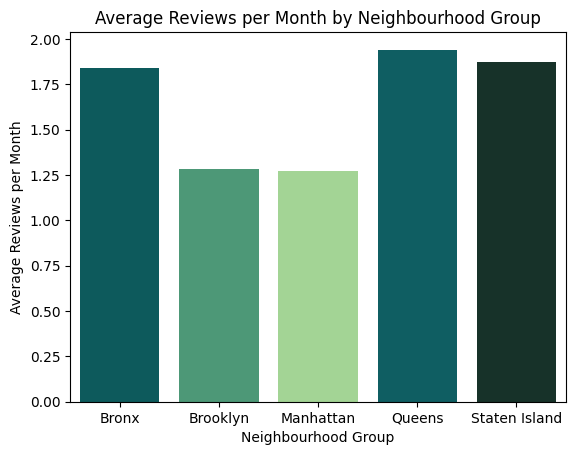

In [ ]:
# Chart - 7 visualization code
# Bar Plot: Average Reviews of each Neighbourhood Group
plt.figure()
fig_palette = ["#006769","#40A578","#9DDE8B","#016A70","#12372A"]
avg_reviews_p_month = air_bnb.groupby('neighbourhood_group')['reviews_per_month'].mean()
sns.barplot(x=avg_reviews_p_month.index,y=avg_reviews_p_month.values,palette=fig_palette,legend=False)
plt.title('Average Reviews per Month by Neighbourhood Group')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Average Reviews per Month')
plt.show()

##### 1. Why did you pick the specific chart?

**Comparison Across Categories:** The bar plot allows for easy comparison of the average reviews per month between different neighbourhood groups. Each bar represents a distinct category (neighbourhood group), making it straightforward to identify which group has higher or lower average reviews.

**Visual Clarity:** Bar plots are effective in showing differences in means or averages across categories due to their simplicity and clear representation of values. This clarity helps in understanding the distribution of review activity across neighbourhood groups.

**Palette Selection:** The use of a color palette (fig_palette) enhances visual appeal and can help differentiate between the bars representing different neighbourhood groups without the need for a legend, thus simplifying the presentation.

**Insight Generation:** By observing the differences in average reviews per month across neighbourhood groups, insights can be gained into which areas attract more frequent guest reviews. This information can be valuable for hosts and property managers to understand the popularity and guest satisfaction levels in different parts of the city.

##### 2. What is/are the insight(s) found from the chart?

**Manhattan:** Despite being a top tourist destination, Manhattan has a relatively low average number of reviews per month (1.84). This contrasts with its high accommodation prices and popularity, suggesting potential areas for improvement in guest engagement or review solicitation strategies.

**Brooklyn:** Brooklyn maintains a moderate average number of reviews per month (1.28), indicating reasonable guest engagement. However, it falls behind the Bronx in review activity, possibly reflecting different guest demographics or market dynamics.

**Queens:** Queens also shows a moderate average number of reviews per month (1.27), similar to Brooklyn. This borough's review activity underscores its appeal to guests, potentially driven by factors like affordability and diverse attractions.

**Bronx:** The Bronx stands out with the highest average number of reviews per month (1.94), indicating strong guest engagement and satisfaction. This may be due to competitive pricing, unique local experiences, or effective guest interaction strategies by hosts.

**Staten Island:** Staten Island maintains a moderate average number of reviews per month (1.87), comparable to Queens. Its review activity suggests a satisfactory guest experience, albeit slightly lower than that of the Bronx.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Potential Business Impact:**

* **Enhanced Marketing Strategies:** Insights into review activity can help hosts and property managers tailor marketing efforts to highlight strengths and address potential weaknesses in guest satisfaction.

* **Improved Guest Experience:** Understanding which boroughs receive higher reviews can guide investments in amenities, customer service, and local experiences to enhance guest satisfaction and loyalty.

* **Competitive Advantage:** Using review data to differentiate listings based on guest feedback can attract more bookings and increase occupancy rates, leading to improved revenue streams.

**Insights Leading to Negative Growth:**

* **Lower Review Activity in Manhattan:** The relatively lower average number of reviews per month in Manhattan suggests potential challenges in guest engagement or satisfaction despite high prices. This could lead to negative growth if not addressed, as it may indicate lower repeat bookings or negative word-of-mouth.

* **Differential Review Patterns:** Disparities in review activity between boroughs (e.g., Bronx vs. Manhattan) could reflect underlying factors affecting guest experiences. If left unaddressed, such disparities could impact market competitiveness and growth opportunities.

#### Chart - 8 - Loacting on Map

In [ ]:
# Chart - 8 visualization code
# Pointing Neighbourhood Locations on Map
m = folium.Map(location=[40.64749,-73.97237], tiles="OpenStreetMap", zoom_start=11)
air_bnb_loc = air_bnb.groupby('neighbourhood').agg({'latitude': 'first', 'longitude': 'first', 'neighbourhood': 'size'}).rename(columns={'neighbourhood': 'count'}).reset_index()

for i in range(0,len(air_bnb_loc)):
   folium.Marker(
      location=[air_bnb_loc.iloc[i]['latitude'], air_bnb_loc.iloc[i]['longitude']],
      popup=air_bnb_loc.iloc[i]['neighbourhood'],
   ).add_to(m)

# Show the map
m

##### 1. Why did you pick the specific chart?

**Interactive Visualization:** Folium allows for interactive maps that can be zoomed in/out and scrolled, providing a dynamic way to explore data geospatially.

**Location Markers:** The markers on the map represent the locations of Airbnb listings across different neighborhoods. This visual representation helps in understanding the spatial distribution of listings and identifying clusters or patterns.

**Popup Information:** Each marker displays a popup with the name of the neighborhood, providing additional information when clicked. This enhances the map's utility by allowing users to interactively explore details about specific locations.

**OpenStreetMap Tiles:** The choice of using OpenStreetMap tiles as the base map layer ensures that the map is detailed and up-to-date, providing a clear backdrop for visualizing neighborhood locations.

**Data Representation:** By aggregating and displaying the count of listings per neighborhood, the map effectively communicates the density and distribution of Airbnb accommodations across the geographic area of interest (in this case, likely New York City).

##### 2. What is/are the insight(s) found from the chart?

**Pricing Variation:** The analysis revealed a diverse range of pricing options in the Airbnb market, catering to various traveler budgets. This includes luxury accommodations as well as more affordable options across different neighborhoods in NYC.

**Property Types:** The predominant property types are private rooms and entire homes/apartments, with shared rooms being less common. This reflects the preferences of guests and the offerings by hosts in different neighborhoods.

**Market Segmentation:** The market share analysis highlighted different price segments catering to diverse traveler preferences. Understanding these segments can help hosts tailor their offerings and pricing strategies effectively.

**Competitive Landscape:** The competitive analysis emphasized the importance for hosts to strategically position themselves within their price ranges to attract bookings and maintain competitiveness in the market.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Potential Positive Business Impact:**

* **Strategic Pricing:** Hosts can use insights into pricing variation and market segmentation to optimize their pricing strategies. This includes adjusting prices based on neighborhood demand, seasonality, and competitive positioning to maximize occupancy rates and revenue.

* **Property Management:** Understanding property types and guest preferences allows hosts to enhance property offerings. This might involve improving amenities, enhancing guest experiences, and aligning property features with market demands to attract more bookings.

* **Marketing and Differentiation:** Insights into competitive landscapes and market trends enable hosts to differentiate their listings effectively. This could involve highlighting unique selling points, such as location advantages, special amenities, or local experiences, to appeal to target audiences.

**Insights Leading to Negative Growth:**

* **Price Sensitivity:** The correlation between higher prices and potentially lower review counts suggests that guests may be sensitive to pricing. If hosts set prices too high relative to the value offered or compared to competitors in the same neighborhood, it could lead to reduced bookings and negative growth.

* **Competitive Positioning:** Failure to effectively position listings within their respective price segments or to differentiate adequately may result in lower occupancy rates and reduced competitiveness. This could lead to a stagnation or decline in bookings over time.

* **Market Dynamics:** Changes in market dynamics, such as shifts in traveler preferences or economic conditions, could impact demand for Airbnb accommodations. Hosts need to stay informed about market trends and adjust their strategies accordingly to mitigate negative impacts on business growth.

#### Chart - 9 - Correlation Heatmap

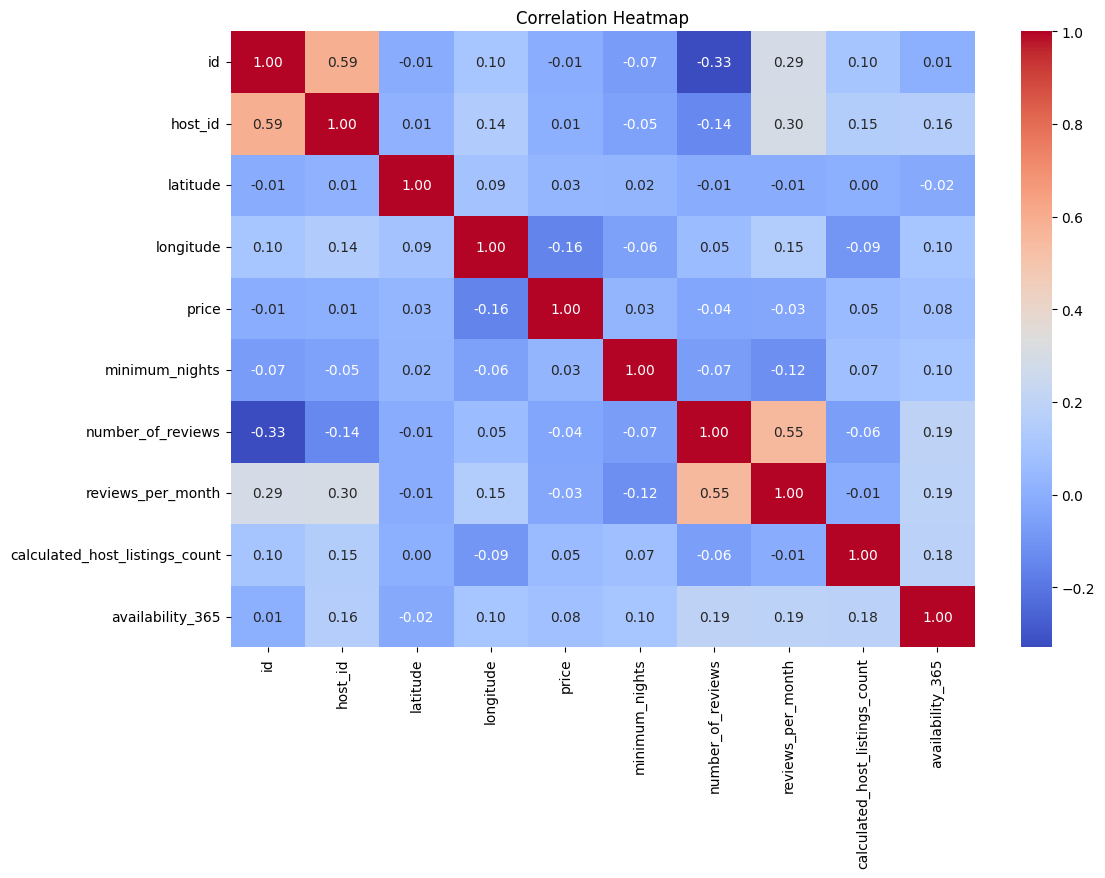

In [ ]:
# Correlation Heatmap visualization code
# Select numerical columns for correlation analysis
numeric_columns = air_bnb.select_dtypes(include=['int64', 'float64'])
# Set the Plot
plt.figure(figsize=(12, 8))
# Correlation Heatmap
sns.heatmap(numeric_columns.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

##### 1. Why did you pick the specific chart?

**1. Visual Clarity:** Heatmaps effectively display the strength of relationships between variables in a dataset. The color gradients help quickly identify the strength and direction (positive or negative) of correlations, making it easier to spot patterns and insights at a glance.

**2. Data-Driven Decision Making:** By visualizing correlations, stakeholders can make informed decisions. For instance, identifying strong correlations between variables like price and reviews per month can guide pricing strategies, marketing efforts, and feature improvements.

**3. Identification of Key Relationships:** The heatmap helps pinpoint which variables are closely related. This is crucial for tasks like feature selection in machine learning, where understanding variable relationships can lead to better model performance.

**4. Ease of Interpretation:** The inclusion of annotation (annot=True) provides exact correlation values on the heatmap, making it easier for viewers to interpret the relationships without needing to refer to the data separately.

**5. Highlighting Areas for Further Analysis:** A heatmap can highlight unexpected correlations or lack thereof, prompting further investigation. For example, if two variables expected to be correlated are not, it might indicate the need for deeper analysis or data review.

##### 2. What is/are the insight(s) found from the chart?

**Positive Correlations:**

**1. 'id' and 'host_id' (0.59):**

* **Analysis:** A moderate positive correlation indicates that newer listings tend to be created by hosts with higher IDs, suggesting that hosts who joined the platform later (or have higher IDs) are adding more recent listings.
* **Implications:** This can be useful for identifying trends among newer hosts, such as their preferences for listing types or pricing strategies.

**2. 'number_of_reviews' and 'reviews_per_month' (0.55):**

* **Analysis:** A positive correlation suggests that listings with a higher number of total reviews also tend to receive more reviews on a monthly basis.
* **Implications:** This indicates that popular listings remain popular over time, possibly due to high guest satisfaction or effective marketing by the host.

**Negative Correlations:**

**1. 'price' and 'minimum_nights' (-0.15):**

* **Analysis:** A slight negative correlation means that listings with lower minimum night requirements tend to have higher prices. This might be due to higher demand for short-term rentals.

* **Implications:** Hosts can consider reducing the minimum night stay to potentially increase their price point, targeting short-term stay travelers who might be willing to pay more for flexibility.

#### Chart - 10 - Pair Plot

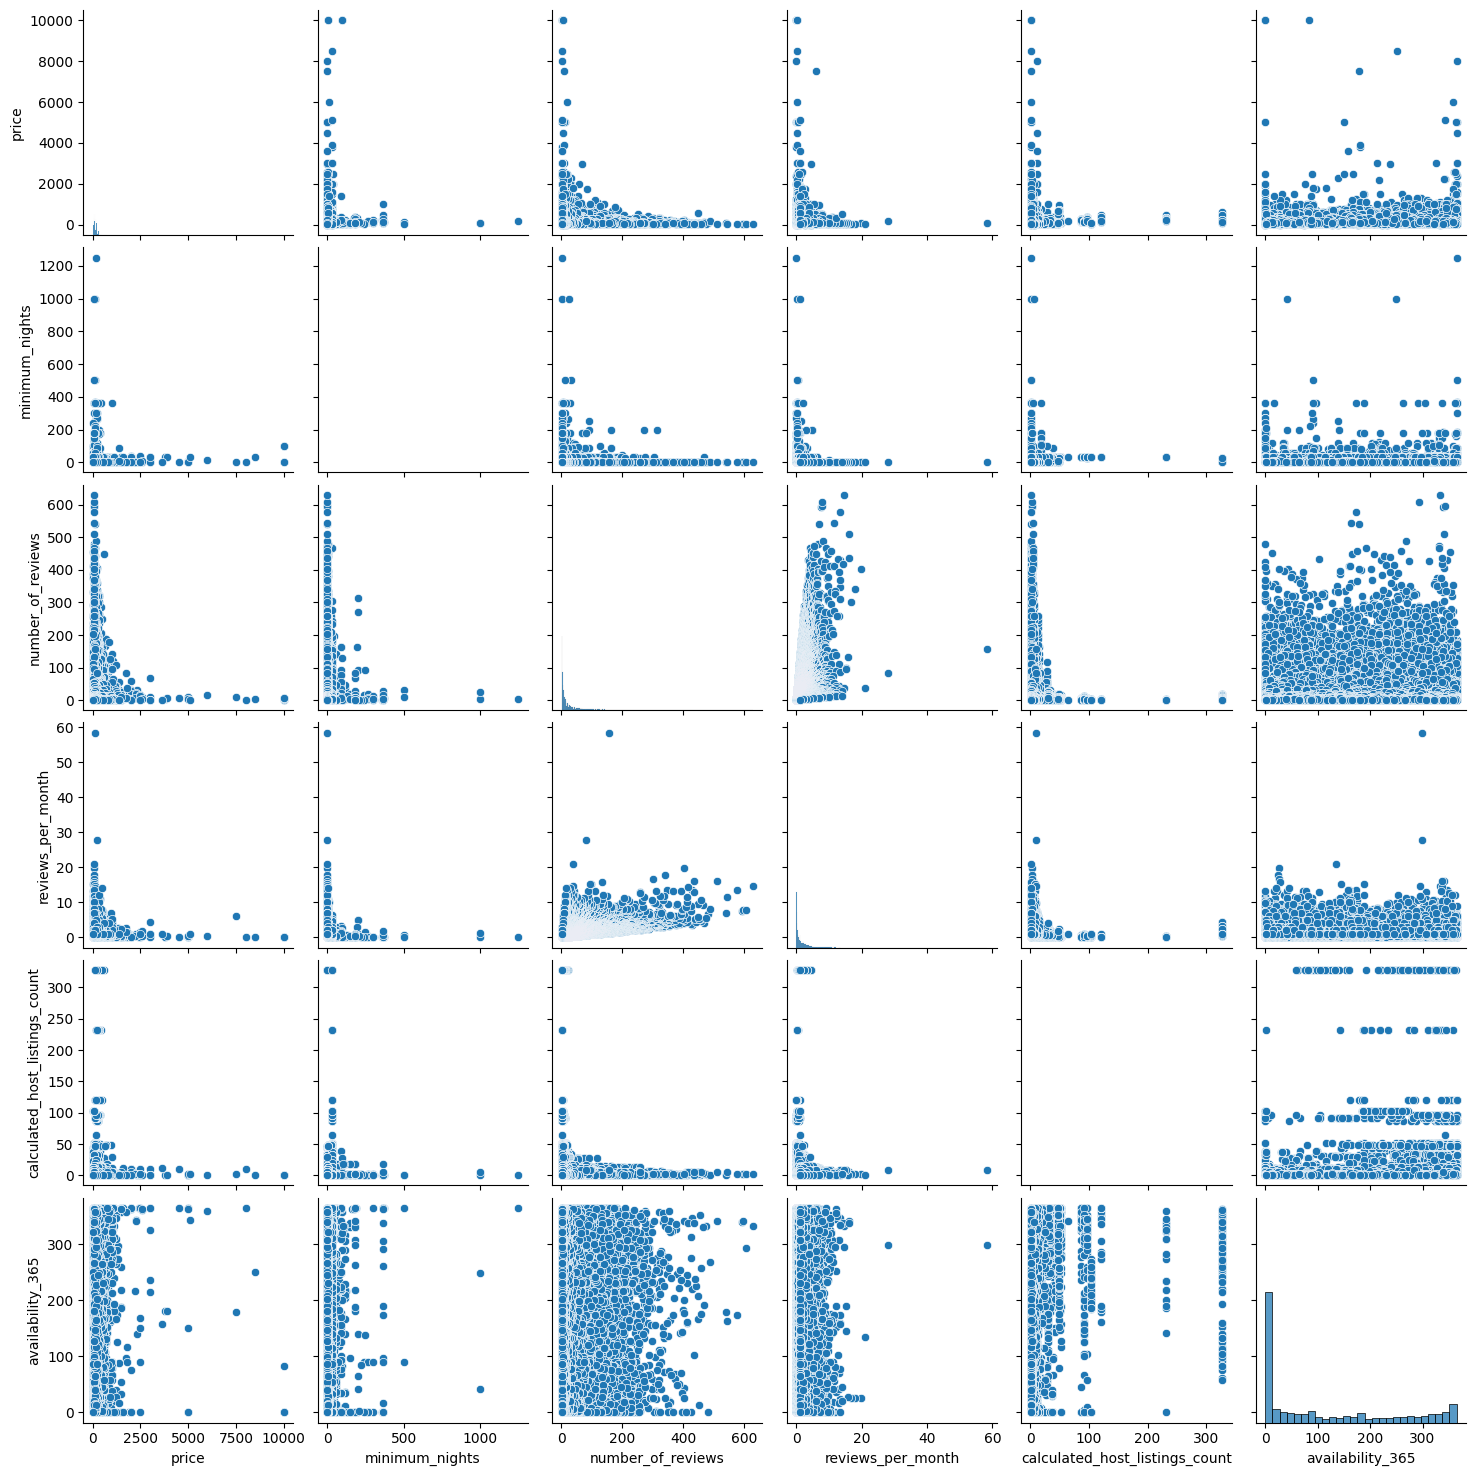

In [ ]:
# Pair Plot visualization code
# Select relevant columns for the pairplot
columns = ['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']

# Drop rows with NaN values in the selected columns
air_bnb_clean = air_bnb[columns].dropna()

# Create a pairplot
sns.pairplot(air_bnb_clean)
plt.show()



##### 1. Why did you pick the specific chart?

**Multi-Variable Relationship:** A pairplot provides a visual representation of the pairwise relationships between multiple variables. This is useful for understanding how different factors might be related to each other.

**Distribution Insights:** Diagonal plots show the distribution of individual variables, giving insights into their spread and central tendencies.

**Correlation Identification:** By examining the scatter plots of variable pairs, potential correlations or trends can be identified. This can be especially useful in identifying how different factors like price, number of reviews, and availability are related.

**Outlier Detection:** Pairplots can also help in spotting outliers which might affect the analysis.

##### 2. What is/are the insight(s) found from the chart?

**1. Price vs. Minimum Nights:** The scatter plot between price and minimum_nights reveals that listings with higher prices generally have a lower minimum night requirement. This suggests that higher-priced listings may cater to short-term travelers or tourists.

**2. Price vs. Number of Reviews:** There appears to be a wide range of prices for listings with a small number of reviews. However, as the number of reviews increases, the price tends to stabilize around a certain range. This could indicate that more established listings with many reviews find a price point that works well for them.

**3. Price vs. Reviews per Month:** Listings with a higher number of reviews per month tend to have more competitive pricing. This suggests that listings which attract more frequent reviews may be more popular due to their affordability or value for money.

**4. Price vs. Calculated Host Listings Count:** Listings managed by hosts with a higher number of total listings (hosts who manage many properties) tend to have varying prices. This might indicate that professional hosts operate properties across different price ranges.

**5. Price vs. Availability 365:** There seems to be no strong linear relationship between price and the number of days a listing is available per year. However, some high-priced listings show lower availability, potentially indicating high occupancy rates.

**6. Minimum Nights vs. Number of Reviews:** Listings with very high minimum night requirements generally have fewer reviews. This may suggest that longer minimum stays are less attractive to guests who prefer more flexibility.

**7. Minimum Nights vs. Reviews per Month:** Listings with a high number of reviews per month typically have lower minimum night requirements. This aligns with the preference for shorter stays, allowing more guests to book within a month.

**8. Number of Reviews vs. Reviews per Month:** A positive correlation is observed, indicating that listings with a higher total number of reviews also tend to receive more reviews on a monthly basis. This suggests sustained popularity over time.

**9. Number of Reviews vs. Calculated Host Listings Count:** Hosts with many listings generally have properties with fewer reviews, indicating that they may manage a larger portfolio of properties, potentially leading to less attention to individual listings.

**10. Reviews per Month vs. Availability 365:** Listings with higher availability throughout the year tend to have more reviews per month, suggesting that being available for booking more days leads to higher occupancy and more frequent guest feedback.

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ?


**1. Pricing Strategy:**
* **Competitive Pricing:** Ensure that your pricing is competitive and aligned with market trends. Listings with a large number of reviews often have stabilized prices, indicating an optimal range that balances occupancy and profitability.
* **Dynamic Pricing:** Implement dynamic pricing strategies to adjust prices based on demand, seasonality, local events, and competitor pricing. This can help maximize revenue and occupancy rates.

**2. Minimum Night Requirements:**
* **Flexible Minimum Nights:** Consider reducing the minimum night stay requirements, especially for high-demand periods, to attract more short-term bookings. This can increase the frequency of reviews and overall occupancy.
* **Tailored Requirements:** Use data to tailor minimum night requirements based on the property type, location, and typical guest preferences.

**3. Enhancing Guest Experience:**
* **Amenities and Quality:** Invest in amenities and ensure high standards of quality and cleanliness to meet guest expectations. Properties with better amenities and high guest satisfaction tend to receive more positive reviews.
* **Personalized Experiences:** Offer personalized recommendations and experiences, such as local guides, personalized welcome packages, or unique property features, to differentiate your listings.

**4. Marketing and Visibility:**
* **Targeted Marketing:** Use targeted marketing strategies to reach specific guest segments. Highlight unique features, proximity to attractions, and guest reviews to attract potential guests.
* **Professional Photography:** Invest in professional photography to showcase the property effectively. High-quality images can significantly impact booking decisions.

**5. Leveraging Reviews:**
* **Encourage Reviews:** Actively encourage guests to leave reviews. Positive reviews enhance the property’s credibility and attractiveness to potential guests.
* **Respond to Feedback:** Respond to guest reviews, both positive and negative, to show that you value feedback and are committed to improving the guest experience.

**6. Optimizing Availability:**
* **Maximize Availability:** Ensure your property is available for booking as much as possible. Properties with higher availability tend to attract more bookings and reviews.
* **Seasonal Adjustments:** Adjust availability and pricing based on seasonal demand. Consider offering discounts or special deals during low-demand periods to maintain occupancy.

**7. Data-Driven Decisions:**
* **Analyze Trends:** Regularly analyze booking trends, guest preferences, and competitor performance. Use this data to make informed decisions about pricing, amenities, and marketing strategies.
* **Performance Monitoring:** Continuously monitor the performance of your listings, including occupancy rates, average daily rates, and review scores, to identify areas for improvement.

**8. Expanding Listings:**
* **Diversify Property Types:** If possible, diversify the types of properties you offer (e.g., entire homes, private rooms, unique stays) to cater to a broader range of guests.
* **Explore New Locations:** Consider expanding your listings to high-demand neighborhoods or emerging areas to capture new market opportunities.

# **Conclusion**

In conclusion, the comprehensive analysis of the Airbnb NYC 2019 dataset has provided valuable insights into various aspects of the short-term rental market. By examining factors such as pricing, room types, neighborhood distributions, and guest engagement, several key findings and strategic recommendations have emerged.

**Key Insights:**

* **Pricing Trends:** Manhattan commands the highest average prices, reflecting its premium location and high demand, while the Bronx and Queens offer more budget-friendly options.
* **Room Types:** Entire homes/apartments are priced significantly higher than private and shared rooms, highlighting the premium for privacy and space.
* **Guest Engagement:** Listings with lower prices tend to receive more reviews, indicating price sensitivity among guests. The number of reviews per month also varies by neighborhood, with the Bronx showing the highest guest engagement.

**Strategic Recommendations:**

* **Competitive and Dynamic Pricing:** Implement competitive and dynamic pricing strategies to optimize revenue and occupancy.
* **Flexible Minimum Nights:** Adjust minimum night stay requirements to attract more short-term bookings and increase occupancy rates.
* **Enhancing Guest Experience:** Invest in amenities and personalized experiences to meet guest expectations and differentiate listings.
* **Targeted Marketing and Visibility:** Use targeted marketing and professional photography to enhance property visibility and attract specific guest segments.
* **Leveraging Reviews:** Actively encourage and respond to guest reviews to enhance credibility and guest satisfaction.
* **Maximizing Availability:** Ensure maximum availability of properties and adjust based on seasonal demand to maintain occupancy.
* **Data-Driven Decisions:** Continuously analyze trends and monitor performance to make informed decisions and improve property management.
* **Expanding Listings:** Consider diversifying property types and exploring new locations to capture broader market opportunities.


By following these recommendations, the client can enhance the performance of their Airbnb properties, increase guest satisfaction, and achieve sustainable business growth. The insights gained from this analysis provide a solid foundation for making strategic decisions and optimizing the overall operation of the short-term rental business.

### ***Hurrah! You have successfully completed your EDA Capstone Project !!!***